In [95]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
preprocesado = pd.read_csv(os.path.join("data","Datos_Proyecto_Aplica.csv"))

In [3]:
preprocesado

,Unnamed: 0,movie_id,title,cast_id,character,credit_id_cast,gender_cast,id_cast,name_cast,order,...,runtime,spoken_languages,vote_average,vote_count,id_key,id_genres,id_production_companies,iso_production_countries,iso_spoken_languages,movies+tagline
0,0,19995,Avatar,"[242, 3, 25, 4, 5, 8, 7, 9, 11, 10, 12, 13, 32...","['Jake Sully', 'Neytiri', 'Dr. Grace Augustine...","['5602a8a7c3a3685532001c9a', '52fe48009251416c...","[2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, ...","[65731, 8691, 10205, 32747, 17647, 1771, 59231...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,162.0,"['English', 'Español']",7.2,11800,"[1463, 2964, 3386, 3388, 3679, 3801, 9685, 984...","[28, 12, 14, 878]","[289, 306, 444, 574]","['US', 'GB']","['en', 'es']","Avatar, Enter the World of Pandora."
1,1,285,Pirates of the Caribbean: At World's End,"[4, 5, 6, 12, 10, 9, 7, 14, 13, 11, 19, 8, 37,...","['Captain Jack Sparrow', 'Will Turner', 'Eliza...","['52fe4232c3a36847f800b50d', '52fe4232c3a36847...","[2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...","[85, 114, 116, 1640, 1619, 2440, 118, 1709, 24...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,169.0,['English'],6.9,4500,"[270, 726, 911, 1319, 2038, 2052, 2580, 2660, ...","[12, 14, 28]","[2, 130, 19936]",['US'],['en'],"Pirates of the Caribbean: At World's End, At t..."
2,2,206647,Spectre,"[1, 14, 13, 10, 17, 8, 11, 16, 15, 19, 23, 24,...","['James Bond', 'Blofeld', 'Madeleine', 'M', 'L...","['52fe4d22c3a368484e1d8d6b', '54805866c3a36829...","[2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 1, 0, 1, ...","[8784, 27319, 121529, 5469, 28782, 17064, 2038...","['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,148.0,"['Français', 'English', 'Español', 'Italiano',...",6.3,4466,"[470, 818, 4289, 9663, 14555, 156095, 158431]","[28, 12, 80]","[5, 10761, 69434]","['GB', 'US']","['fr', 'en', 'es', 'it', 'de']","Spectre, A Plan No One Escapes"
3,3,49026,The Dark Knight Rises,"[2, 8, 5, 3, 4, 15, 6, 7, 46, 9, 47, 43, 45, 4...","['Bruce Wayne / Batman', 'Alfred Pennyworth', ...","['52fe4781c3a36847f8139869', '52fe4781c3a36847...","[2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, ...","[3894, 3895, 64, 1813, 2524, 8293, 24045, 192,...","['Christian Bale', 'Michael Caine', 'Gary Oldm...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,165.0,['English'],7.6,9106,"[849, 853, 949, 1308, 1437, 3051, 3562, 6969, ...","[28, 80, 18, 53]","[923, 6194, 9993, 9996]",['US'],['en'],"The Dark Knight Rises, The Legend Ends"
4,4,49529,John Carter,"[5, 20, 7, 3, 8, 2, 4, 9, 10, 11, 12, 13, 14, ...","['John Carter', 'Dejah Thoris', 'Sola', 'Tars ...","['52fe479ac3a36847f813ea75', '52fe479ac3a36847...","[2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, ...","[60900, 21044, 2206, 5293, 19159, 2983, 8785, ...","['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,132.0,['English'],6.1,2124,"[818, 839, 1456, 3801, 7376, 9951, 10028, 1053...","[28, 12, 878]",[2],['US'],['en'],"John Carter, Lost in our world, found in another."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,9367,El Mariachi,"[1, 3, 4, 18, 19, 20, 21]","['El Mariachi', 'Bigotón', 'Mauricio (Moco)', ...","['52fe44eec3a36847f80b27f9', '52fe44eec3a36847...","[2, 0, 2, 0, 0, 0, 2]","[20498, 57470, 57471, 1192733, 1192734, 129334...","['Carlos Gallardo', 'Jaime de Hoyos', 'Peter M...","[0, 2, 3, 4, 5, 6, 7]",...,81.0,['Español'],6.6,238,"[5616, 33649, 162740, 187891, 206558]","[28, 80, 53]",[5],"['MX', 'US']",['es'],"El Mariachi, He didn't come looking for troubl..."
4799,4799,72766,Newlyweds,"[1, 2, 3, 4, 7]","['Buzzy', 'Linda', 'Marsha', 'Katie', 'Vanessa']","['52fe487dc3a368484e0fb001', '52fe487dc3a36848...","[2, 1, 1, 1, 0]","[12833, 58356, 17188, 211993, 1257819]","['Edward Burns', 'Kerry Bishé', 'Marsha Dietl

Gráfica de las peliculas más populares

Text(0.5, 1.0, 'Peliculas más populares')

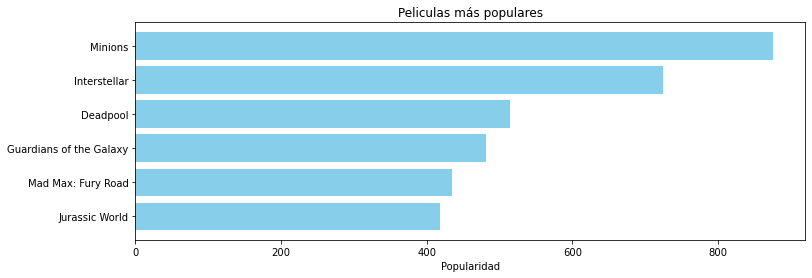

In [4]:
pop= preprocesado.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularidad")
plt.title("Peliculas más populares")

Veamos el top 10 películas con más votos y mejor valorados.

In [5]:
q_movies = preprocesado.sort_values('vote_count', ascending=False)
q_movies[['title', 'vote_count', 'vote_average']].head(20)

,title,vote_count,vote_average
96,Inception,13752,8.1
65,The Dark Knight,12002,8.2
0,Avatar,11800,7.2
16,The Avengers,11776,7.4
788,Deadpool,10995,7.4
95,Interstellar,10867,8.1
287,Django Unchained,10099,7.8
94,Guardians of the Galaxy,9742,7.9
426,The Hunger Games,9455,6.9
127,Mad Max: Fury Road,9427,7.2


In [6]:

q_movies = preprocesado.sort_values('vote_average', ascending=False)

q_movies[['title', 'vote_count', 'vote_average']].head(10)

,title,vote_count,vote_average
3519,Stiff Upper Lips,1,10.0
4247,Me You and Five Bucks,2,10.0
4045,"Dancer, Texas Pop. 81",1,10.0
4662,Little Big Top,1,10.0
3992,Sardaarji,2,9.5
2386,One Man's Hero,2,9.3
2970,There Goes My Baby,2,8.5
1881,The Shawshank Redemption,8205,8.5
2796,The Prisoner of Zenda,11,8.4
3337,The Godfather,5893,8.4


Aquí vemos que no son comparables los top, por lo que estableceremos la media geométrica entre estas para poder compararlas.

(array([4.124e+03, 3.910e+02, 1.470e+02, 7.100e+01, 3.700e+01, 1.400e+01,
        1.100e+01, 4.000e+00, 3.000e+00, 1.000e+00]),
 array([    0. ,  1375.2,  2750.4,  4125.6,  5500.8,  6876. ,  8251.2,
         9626.4, 11001.6, 12376.8, 13752. ]),
 <a list of 10 Patch objects>)

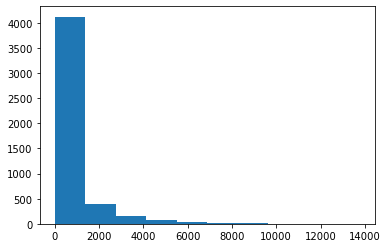

In [7]:
# esta sesgado
plt.hist(preprocesado["vote_count"])

In [8]:
preprocesado["Score"]= np.sqrt(preprocesado["vote_average"]* preprocesado["vote_count"])

In [9]:

q_movies = preprocesado.sort_values('Score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average','Score']].head(30)

,title,vote_count,vote_average,Score
96,Inception,13752,8.1,333.753202
65,The Dark Knight,12002,8.2,313.713882
95,Interstellar,10867,8.1,296.686198
16,The Avengers,11776,7.4,295.198916
0,Avatar,11800,7.2,291.478987
788,Deadpool,10995,7.4,285.242003
287,Django Unchained,10099,7.8,280.663856
662,Fight Club,9413,8.3,279.513685
94,Guardians of the Galaxy,9742,7.9,277.419898
634,The Matrix,8907,7.9,265.264585


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
preprocesado['overview'] = preprocesado['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(preprocesado['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [11]:
preprocesado.shape

(4803, 38)

In [12]:
pd.DataFrame(data=tfidf_matrix)

,0
0,"(0, 3545)\t0.27493285363270825\n (0, 795)\t..."
1,"(0, 14969)\t0.2764509091386784\n (0, 18376)..."
2,"(0, 17578)\t0.258771372234332\n (0, 19371)\..."
3,"(0, 6351)\t0.11868109072399691\n (0, 2506)\..."
4,"(0, 8506)\t0.14683290054814035\n (0, 15720)..."
...,...
4798,"(0, 1580)\t0.18714469162311398\n (0, 8368)\..."
4799,"(0, 1259)\t0.44333299556973355\n (0, 15688)..."
4800,"(0, 7728)\t0.20302881573770096\n (0, 13571)..."
4801,"(0, 9383)\t0.2005003358275853\n (0, 15494)\..."


In [13]:
preprocesado.overview

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [14]:
def Jaccard_Similarity(doc1, doc2): 
    
    # List the unique words in a document
    words_doc1 = set(doc1.lower().split()) 
    words_doc2 = set(doc2.lower().split())
    
    # Find the intersection of words list of doc1 & doc2
    intersection = words_doc1.intersection(words_doc2)

    # Find the union of words list of doc1 & doc2
    union = words_doc1.union(words_doc2)
    if len(union)==0:
        return 0
     
    else:    
        # Calculate Jaccard similarity score 
        # using length of intersection set divided by length of union set
        return float(len(intersection)) / len(union)

In [15]:
preprocesado.shape[0]

4803

In [19]:
JS_matriz = np.zeros((4803,4803))
for pelicula in range(preprocesado.shape[0]):
    if pelicula%500==0:
        print(round(pelicula/preprocesado.shape[0],2))
    for pelicula_2 in range(pelicula,preprocesado.shape[0]):
        JS_matriz[pelicula,pelicula_2] = Jaccard_Similarity(preprocesado.overview[pelicula], preprocesado.overview[pelicula_2])


0.0
0.1
0.21
0.31
0.42
0.52
0.62
0.73
0.83
0.94


In [34]:
JS_matriz_final=JS_matriz+ JS_matriz.T- np.identity(preprocesado.shape[0])

In [36]:
pd.DataFrame(JS_matriz_final)

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.100000,0.070175,0.095890,0.150000,0.096774,0.068966,0.108108,0.080000,0.067568,...,0.068182,0.067797,0.099010,0.111111,0.076923,0.095238,0.083333,0.100000,0.082192,0.080000
1,0.100000,1.000000,0.066667,0.077922,0.090909,0.059701,0.043478,0.089744,0.096154,0.064935,...,0.020408,0.081967,0.055556,0.121622,0.095238,0.058824,0.076923,0.058140,0.078947,0.050000
2,0.070175,0.066667,1.000000,0.059524,0.068493,0.054795,0.040816,0.083333,0.050000,0.060241,...,0.037037,0.043478,0.052632,0.047059,0.070796,0.068493,0.066667,0.077778,0.060241,0.058824
3,0.095890,0.077922,0.059524,1.000000,0.089888,0.066667,0.070796,0.100000,0.078947,0.070000,...,0.027397,0.070588,0.069231,0.080000,0.085271,0.089888,0.080645,0.074074,0.103093,0.090000
4,0.150000,0.090909,0.068493,0.089888,1.000000,0.089744,0.100000,0.137931,0.109375,0.078652,...,0.066667,0.066667,0.084746,0.077778,0.093220,0.102564,0.076923,0.093750,0.116279,0.101124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.095238,0.058824,0.068493,0.089888,0.102564,0.062500,0.057692,0.100000,0.092308,0.054945,...,0.049180,0.066667,0.075630,0.065934,0.084034,1.000000,0.037037,0.071429,0.103448,0.113636
4799,0.083333,0.076923,0.066667,0.080645,0.076923,0.078431,0.052632,0.061538,0.051282,0.047619,...,0.030303,0.063830,0.042553,0.080645,0.053191,0.037037,1.000000,0.071429,0.081967,0.046154
4800,0.100000,0.058140,0.077778,0.074074,0.093750,0.083333,0.084034,0.072727,0.071429,0.074766,...,0.064103,0.064516,0.088889,0.094340,0.072464,0.071429,0.071429,1.000000,0.084906,0.073394
4801,0.082192,0.078947,0.060241,0.103093,0.116279,0.079545,0.081081,0.079208,0.094595,0.070707,...,0.027778,0.084337,0.078125,0.091837,0.094488,0.103448,0.081967,0.084906,1.000000,0.102041


In [24]:
pd.DataFrame(JS_matriz).to_csv("Jaccard_Similarity.csv",index=False)

In [26]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [30]:
pd.DataFrame(cosine_sim).to_csv("cosine_Similarity.csv",index=False)

In [33]:
indices = pd.Series(preprocesado.index, index=preprocesado['title']).drop_duplicates()

In [42]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim, jaccard_sim= JS_matriz_final):
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    jacc_scores = list(enumerate(jaccard_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    jacc_scores = sorted(jacc_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    jacc_scores= jacc_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    movie_indices_J = [i[0] for i in jacc_scores]
    # Return the top 10 most similar movies
    return preprocesado['title'].iloc[movie_indices], preprocesado['title'].iloc[movie_indices_J]

In [43]:
Cos,Jacc=get_recommendations('The Dark Knight Rises')

In [44]:
Cos

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [45]:
Jacc

299          Batman Forever
3607        The Beastmaster
1449              The Order
1246      Quest for Camelot
2921             Drive Hard
65          The Dark Knight
694     The Bourne Identity
1278             The Gunman
3591             Nighthawks
173          Happy Feet Two
Name: title, dtype: object

In [52]:
preprocesado[["title","Score"]]

,title,Score
0,Avatar,291.478987
1,Pirates of the Caribbean: At World's End,176.210102
2,Spectre,167.737295
3,The Dark Knight Rises,263.069573
4,John Carter,113.826183
...,...,...
4798,El Mariachi,39.633319
4799,Newlyweds,5.431390
4800,"Signed, Sealed, Delivered",6.480741
4801,Shanghai Calling,6.316645


In [56]:
preprocesado.iloc[preprocesado.dtypes== np.int64 or preprocesado.dtypes== np.float64 ]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [66]:
numeric_features = list(preprocesado.dtypes[preprocesado.dtypes != "object"].index)
numericas_prepro=preprocesado[numeric_features].iloc[:,1:].drop(["id","vote_average","vote_count"],axis=1)

In [67]:
numericas_prepro

,movie_id,budget,popularity,revenue,runtime,Score
0,19995,237000000,150.437577,2787965087,162.0,291.478987
1,285,300000000,139.082615,961000000,169.0,176.210102
2,206647,245000000,107.376788,880674609,148.0,167.737295
3,49026,250000000,112.312950,1084939099,165.0,263.069573
4,49529,260000000,43.926995,284139100,132.0,113.826183
...,...,...,...,...,...,...
4798,9367,220000,14.269792,2040920,81.0,39.633319
4799,72766,9000,0.642552,0,85.0,5.431390
4800,231617,0,1.444476,0,120.0,6.480741
4801,126186,0,0.857008,0,98.0,6.316645


In [73]:
numericas_prepro[1:].get

movie_id      0
budget        0
popularity    0
revenue       0
runtime       2
Score         0
dtype: int64

In [90]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(numericas_prepro[1:])

In [86]:
#imputamos por el promedio los dos perdidos
is_NaN = numericas_prepro.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = numericas_prepro[row_has_NaN]
numericas_prepro.loc[numericas_prepro[row_has_NaN].index,"runtime"]= numericas_prepro.runtime.mean()

NameError: name 'sns' is not defined

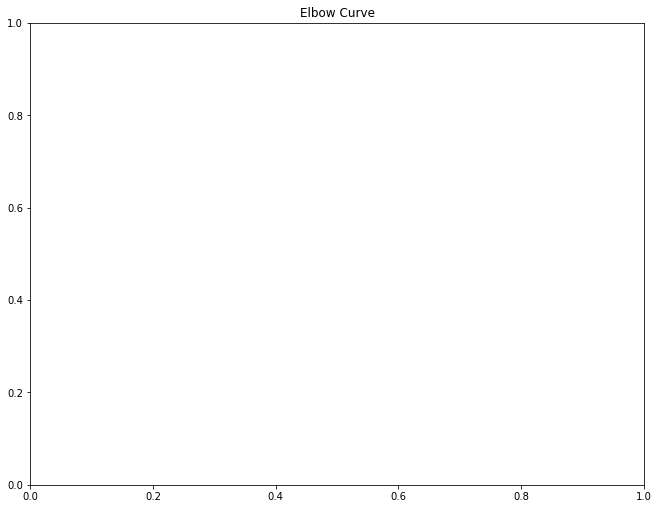

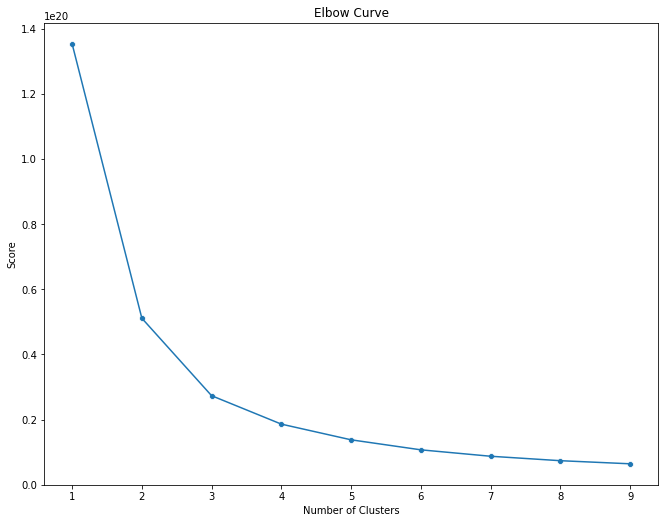

In [121]:
# implementación de la regla del codo
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(numericas_prepro.iloc[:,1:]).inertia_ for i in range(len(kmeans))]


df_Elbow = pd.DataFrame({'Number of Clusters':Nc,
                        'Score':score})

df_Elbow.head()
# graficar los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)

In [122]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(numericas_prepro.iloc[:,1:])

In [120]:
numericas_prepro.iloc[:,1:]

,budget,popularity,revenue,runtime,Score
0,237000000,150.437577,2787965087,162.0,291.478987
1,300000000,139.082615,961000000,169.0,176.210102
2,245000000,107.376788,880674609,148.0,167.737295
3,250000000,112.312950,1084939099,165.0,263.069573
4,260000000,43.926995,284139100,132.0,113.826183
...,...,...,...,...,...
4798,220000,14.269792,2040920,81.0,39.633319
4799,9000,0.642552,0,85.0,5.431390
4800,0,1.444476,0,120.0,6.480741
4801,0,0.857008,0,98.0,6.316645


In [112]:
preprocesado.head(2)

,Unnamed: 0,movie_id,title,cast_id,character,credit_id_cast,gender_cast,id_cast,name_cast,order,...,spoken_languages,vote_average,vote_count,id_key,id_genres,id_production_companies,iso_production_countries,iso_spoken_languages,movies+tagline,Score
0,0,19995,Avatar,"[242, 3, 25, 4, 5, 8, 7, 9, 11, 10, 12, 13, 32...","['Jake Sully', 'Neytiri', 'Dr. Grace Augustine...","['5602a8a7c3a3685532001c9a', '52fe48009251416c...","[2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, ...","[65731, 8691, 10205, 32747, 17647, 1771, 59231...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,"['English', 'Español']",7.2,11800,"[1463, 2964, 3386, 3388, 3679, 3801, 9685, 984...","[28, 12, 14, 878]","[289, 306, 444, 574]","['US', 'GB']","['en', 'es']","Avatar, Enter the World of Pandora.",291.478987
1,1,285,Pirates of the Caribbean: At World's End,"[4, 5, 6, 12, 10, 9, 7, 14, 13, 11, 19, 8, 37,...","['Captain Jack Sparrow', 'Will Turner', 'Eliza...","['52fe4232c3a36847f800b50d', '52fe4232c3a36847...","[2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, ...","[85, 114, 116, 1640, 1619, 2440, 118, 1709, 24...","['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",...,['English'],6.9,4500,"[270, 726, 911, 1319, 2038, 2052, 2580, 2660, ...","[12, 14, 28]","[2, 130, 19936]",['US'],['en'],"Pirates of the Caribbean: At World's End, At t...",176.210102


In [113]:
numericas_prepro.iloc[1]

movie_id      2.850000e+02
budget        3.000000e+08
popularity    1.390826e+02
revenue       9.610000e+08
runtime       1.690000e+02
Score         1.762101e+02
Name: 1, dtype: float64

In [129]:
np.unique(kmeans.labels_)

array([0, 1, 2])

In [135]:
kmeans.predict([numericas_prepro.iloc[96,1:]])

array([2])

In [124]:
numericas_prepro.iloc[1,1:]

budget        3.000000e+08
popularity    1.390826e+02
revenue       9.610000e+08
runtime       1.690000e+02
Score         1.762101e+02
Name: 1, dtype: float64

In [131]:
numericas_prepro.iloc[65,1:]

budget        1.850000e+08
popularity    1.873229e+02
revenue       1.004558e+09
runtime       1.520000e+02
Score         3.137139e+02
Name: 65, dtype: float64

In [137]:
preprocesado.iloc[65,:]

Unnamed: 0                                                                 65
movie_id                                                                  155
title                                                         The Dark Knight
cast_id                     [35, 3, 15, 17, 8, 16, 34, 258, 228, 20, 227, ...
character                   ['Bruce Wayne', 'Joker', 'Harvey Dent', 'Alfre...
credit_id_cast              ['52fe4220c3a36847f8005d17', '52fe421fc3a36847...
gender_cast                 [2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, ...
id_cast                     [3894, 1810, 6383, 3895, 1579, 64, 192, 53651,...
name_cast                   ['Christian Bale', 'Heath Ledger', 'Aaron Eckh...
order                       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
credit_id_crew              ['55a0eb4a925141296b0010f8', '52fe421fc3a36847...
department                  ['Production', 'Sound', 'Production', 'Writing...
gender_crew                 [1113, 947, 282, 525, 525, 525, 527,

In [138]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
preprocesado['keywords'] = preprocesado['keywords'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(preprocesado['keywords'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 7073)

In [139]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [140]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    
    
    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # Return the top 10 most similar movies
    return preprocesado['title'].iloc[movie_indices]

In [141]:
Cos=get_recommendations('The Dark Knight Rises')

In [143]:
Cos

65      The Dark Knight
119       Batman Begins
1359             Batman
210      Batman & Robin
428      Batman Returns
303            Catwoman
3819           Defendor
1740         Kick-Ass 2
72        Suicide Squad
1010         Panic Room
Name: title, dtype: object

In [149]:
preprocesado.keywords[65]

"['dc comics', 'crime fighter', 'secret identity', 'scarecrow', 'sadism', 'chaos', 'gotham city', 'vigilante', 'joker', 'superhero', 'based on comic book', 'tragic hero', 'organized crime', 'criminal mastermind', 'district attorney', 'imax', 'super villain', 'super powers', 'batman']"

In [150]:
preprocesado.keywords[119]

"['himalaya', 'martial arts', 'dc comics', 'crime fighter', 'secret identity', 'undercover', 'hero', 'loss of father', 'society', 'gotham city', 'vigilante', 'superhero', 'based on comic book', 'rivalry', 'tragic hero', 'ninja', 'good vs evil', 'crime', 'super powers', 'haunted by the past', 'evil doctor', 'escapade', 'master villain', 'fighting crime', 'unfulfillment', 'love and romance', 'unfulfilled love']"

In [151]:
preprocesado.keywords[303]

"['white russian', 'sex', 'dc comics', 'beauty', 'sexism', 'basketball', 'superheroine', 'female protagonist', 'evil corporation', 'catwoman', 'masked superhero', 'cat lady']"